# Retail Sales Data Analysis - Data Analyst Project
This notebook focuses on analyzing retail sales data and deriving insights to make strategic business recommendations. The dataset contains information on sales, product categories, and customer demographics.

## Phase 1: Importing Libraries
We begin by importing the essential Python libraries required for data analysis:

### Step 1: Importing libraries

In [1]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp312-cp312-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   --------------------

## Phase 2: Loading the Dataset
We load the dataset from a CSV file using pd.read_csv() and store it in a variable called df.

### Step 2: Load the Excel files

In [378]:
url = 'https://raw.githubusercontent.com/harsh-aithal/Retail-Sales-Analysis-DA-Project/main/data/superstore_data.csv'
df = pd.read_csv(url, encoding = 'ISO-8859-1')

## Phase 3: Initial Data Exploration (Steps 3–10)

### Step 3: View First Few Rows
Used df.head() to get a quick preview of the data and understand its structure.

In [321]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Step 4: Check Data Info
df.info() shows:
- 9994 entries
- 21 columns
- No null values
- Data types are mostly object, int, and float.

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Step 5: Statistical Summary
df.describe() gives a numerical summary of key fields like Sales, Quantity, Discount, and Profit.

In [326]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Step 6: Null Value Check
df.isnull().sum() confirms there are no missing values in the dataset.

In [329]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Step 7: Check for Duplicates
df.duplicated().sum() shows there are 0 duplicate rows.

In [332]:
df.duplicated().sum()

0

### Step 8: Unique Category Check
Using df['Category'].unique(), we examined the different product categories present in the dataset.

In [335]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

### Step 9: Unique Sub-Category Check
Using df['Sub-Category'].unique(), we checked the different sub-categories present.

In [338]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

### Step 10: Unique Region Check
We checked for the unique regions.

In [341]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

## Phase 4: Data Visualization

### Step 11: Visualizing Sales by Category
We create a bar plot to visualize total sales by each product category.

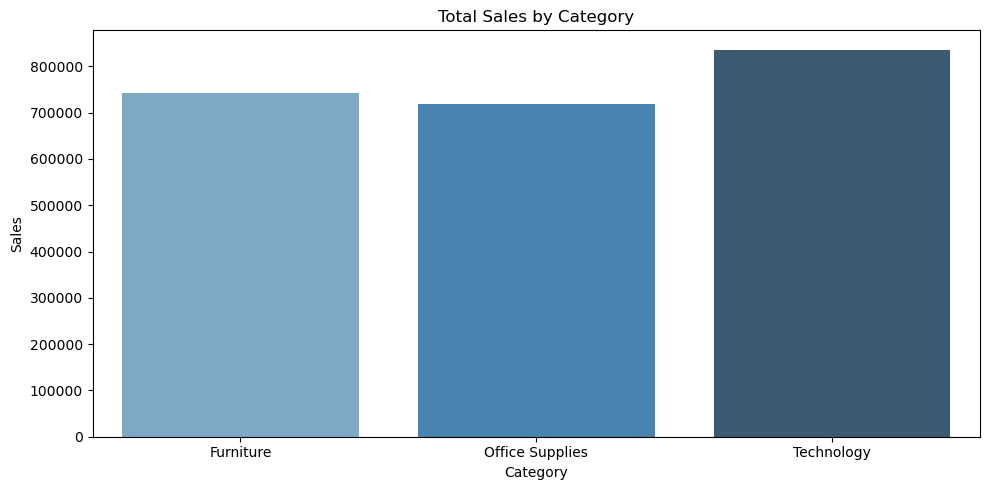

In [380]:
category_group = df.groupby('Category')[['Sales','Profit']].sum().reset_index()
plt.figure(figsize = (10,5))
sns.barplot(x = 'Category', y = 'Sales', hue = 'Category', data = category_group, palette = 'Blues_d', legend = False)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

### Step 12: Visualizing Profit by Category
Now, we create another bar plot to visualize total profit by each product category.

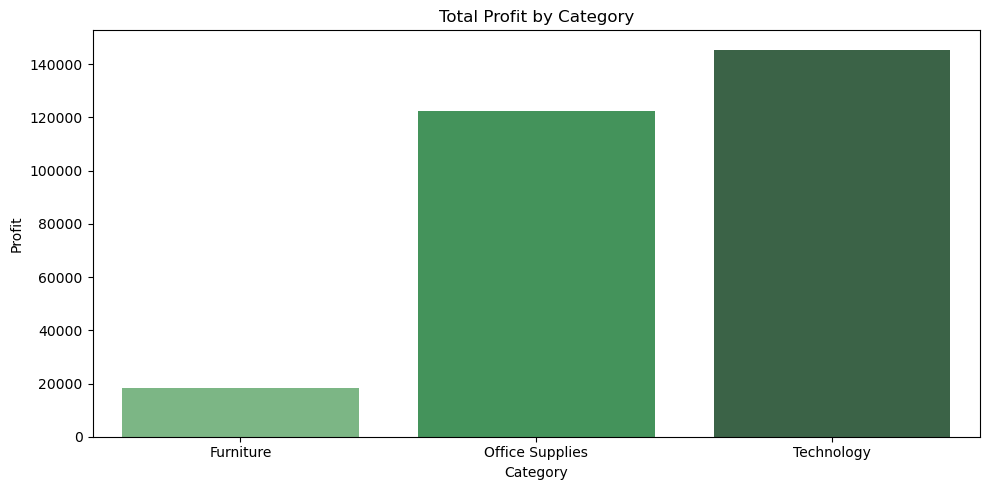

In [382]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Category', y = 'Profit', hue = 'Category', data = category_group, palette = 'Greens_d', legend = False)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

### Step 13: Total Sales by Sub-Category
We group the data by Sub-Category and calculate total sales. Then we plot a bar graph to visualize which sub-categories are generating the most revenue.

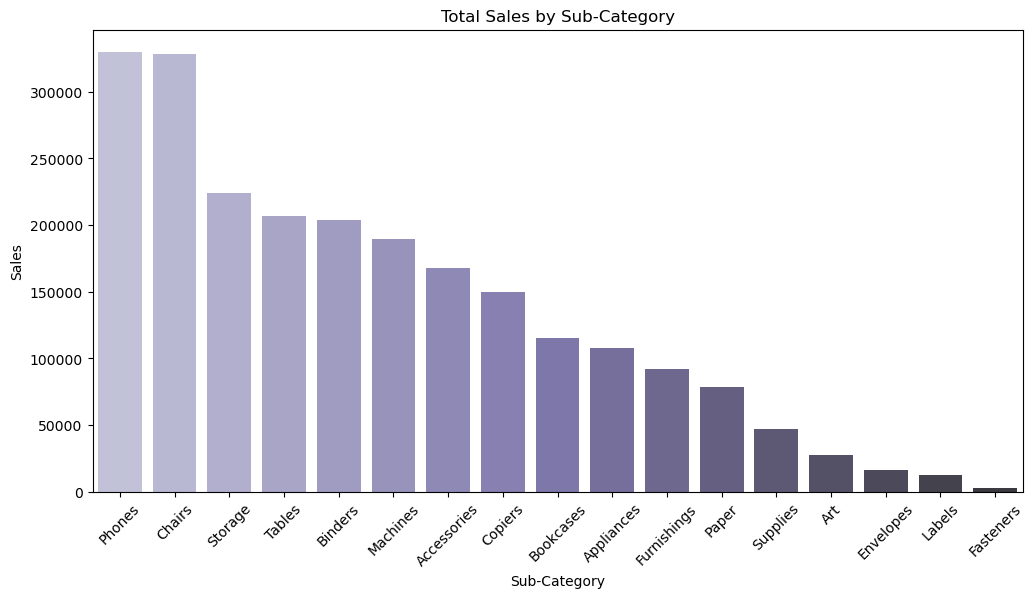

In [384]:
subcategory_group = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by = 'Sales', ascending=False).reset_index()

plt.figure(figsize = (12,6))
sns.barplot(x = 'Sub-Category', y = 'Sales', hue = 'Sub-Category', data = subcategory_group, palette = 'Purples_d', legend = False)
plt.xticks(rotation = 45)
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.show()

### Step 14: Total Profit by Sub-Category
Using the same grouped data, we now visualize profit across sub-categories to see which ones are contributing the most to the bottom line.

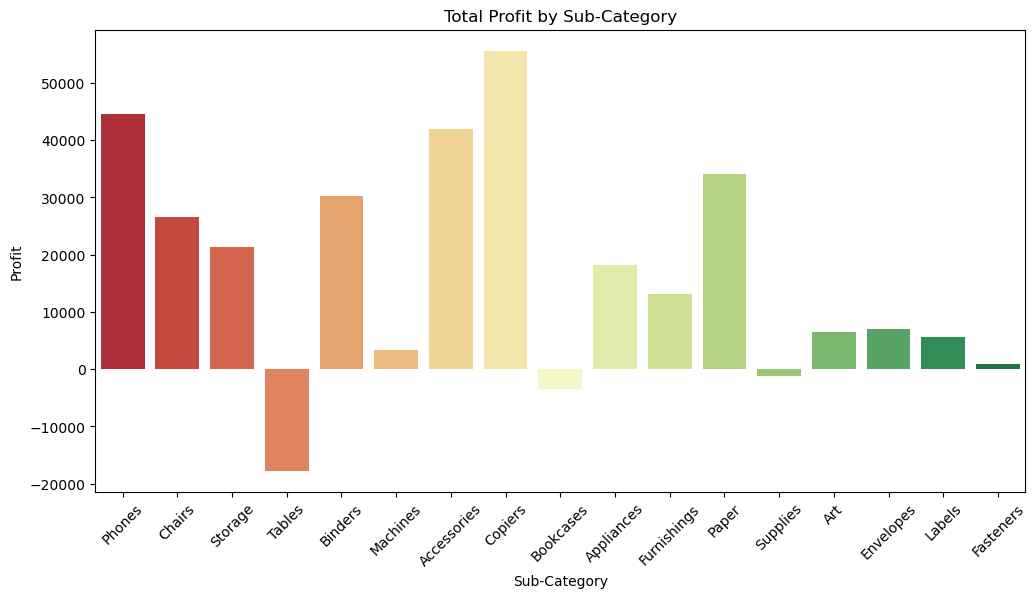

In [386]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Sub-Category', y = 'Profit', hue = 'Sub-Category', data = subcategory_group, palette = 'RdYlGn', legend = False)
plt.xticks(rotation = 45)
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.show()

### Step 15: Sales and Profit by Region
We group the data by Region and sum up both Sales and Profit. This bar chart compares the two metrics side by side to identify regional performance.

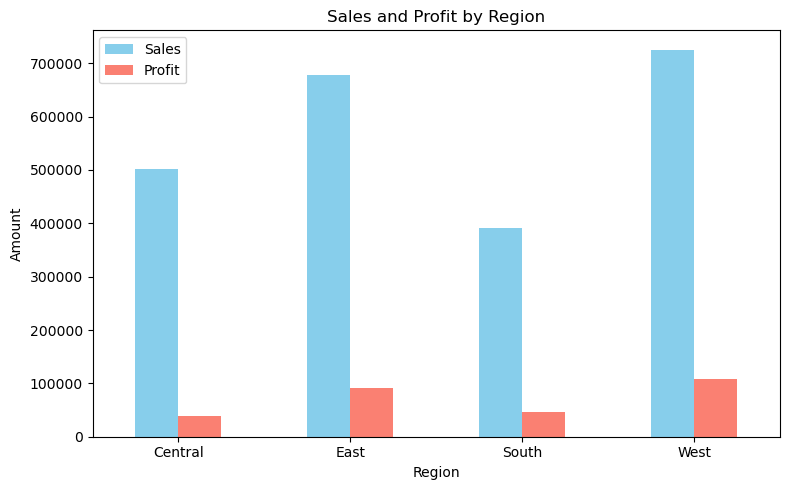

In [388]:
region_group = df.groupby('Region')[['Sales','Profit']].sum().reset_index()

region_group.plot(x = 'Region', kind = 'bar', figsize = (8,5), color = ['skyblue', 'salmon'])
plt.title('Sales and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.xticks(rotation = 0)
plt.legend(['Sales','Profit'])
plt.tight_layout()
plt.show()

### Step 16: Top 10 States by Profit
We identify the top 10 states with the highest total profit and visualize them using a horizontal bar plot.

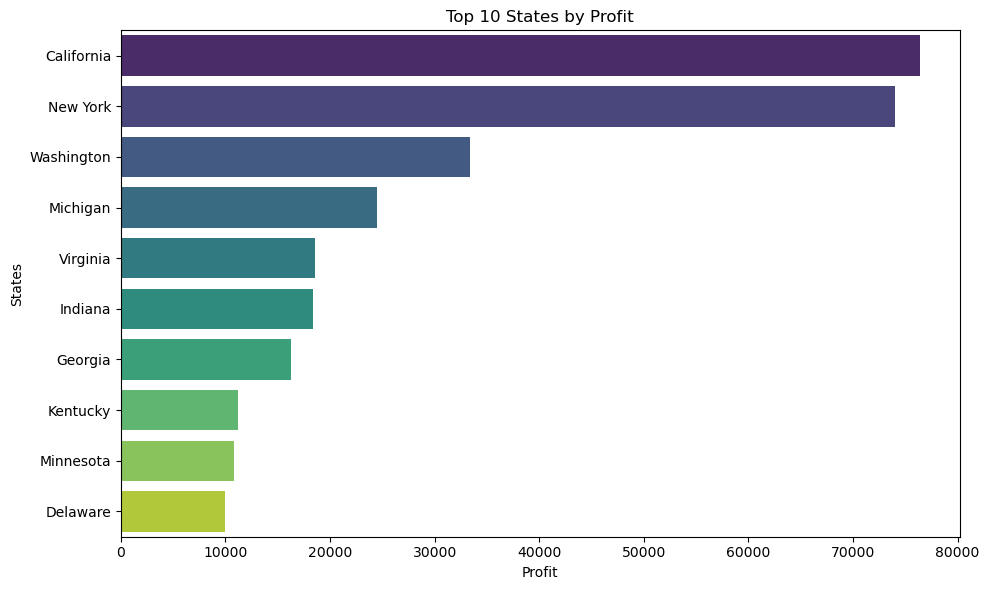

In [390]:
top_states = df.groupby('State')['Profit'].sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (10,6))
sns.barplot(x = top_states.values, y = top_states.index, hue = top_states.index, palette = 'viridis', legend = False)
plt.title('Top 10 States by Profit')
plt.xlabel('Profit')
plt.ylabel('States')
plt.tight_layout()
plt.show()

### Step 17: Bottom 10 States by Profit
Here, we focus on the 10 least profitable states to understand which regions might be underperforming or incurring losses.

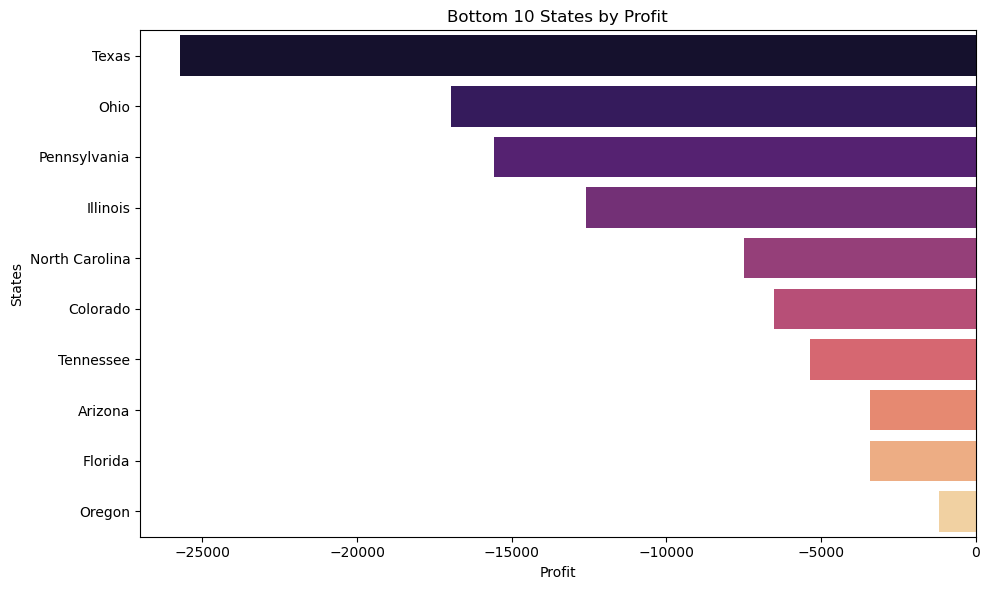

In [392]:
bottom_states = df.groupby('State')['Profit'].sum().sort_values().head(10)

plt.figure(figsize = (10,6))
sns.barplot(x = bottom_states.values, y = bottom_states.index, hue = bottom_states.index, palette = 'magma', legend = False)
plt.title('Bottom 10 States by Profit')
plt.xlabel('Profit')
plt.ylabel('States')
plt.tight_layout()
plt.show()

### Step 18: Visualizing Profit by Sub-Category

We group the data by Sub-Category and calculate total profit for each. Then, we visualize the results using a bar plot to identify which sub-categories are most and least profitable.

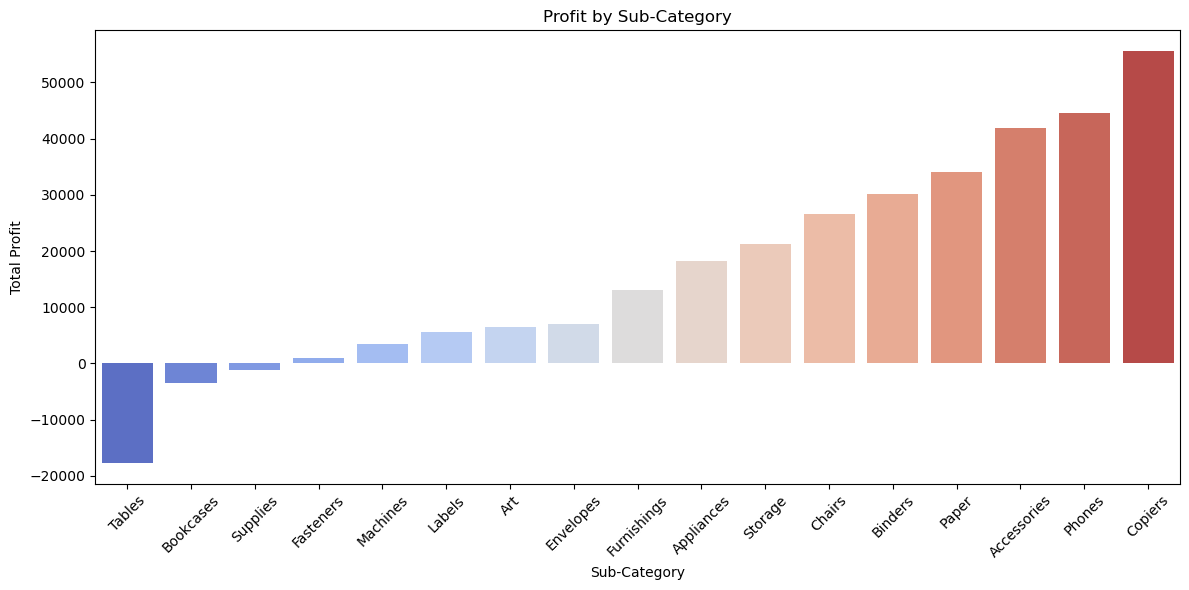

In [396]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

# Plotting
plt.figure(figsize = (12, 6))
sns.barplot(x = subcat_profit.index, y = subcat_profit.values, hue = subcat_profit.index, palette = 'coolwarm')
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Step 19: Analyzing the Relationship Between Discount and Profit

We use a scatter plot to visualize how discount impacts profit across different categories. The horizontal line at 0 helps in identifying where profit turns into a loss.

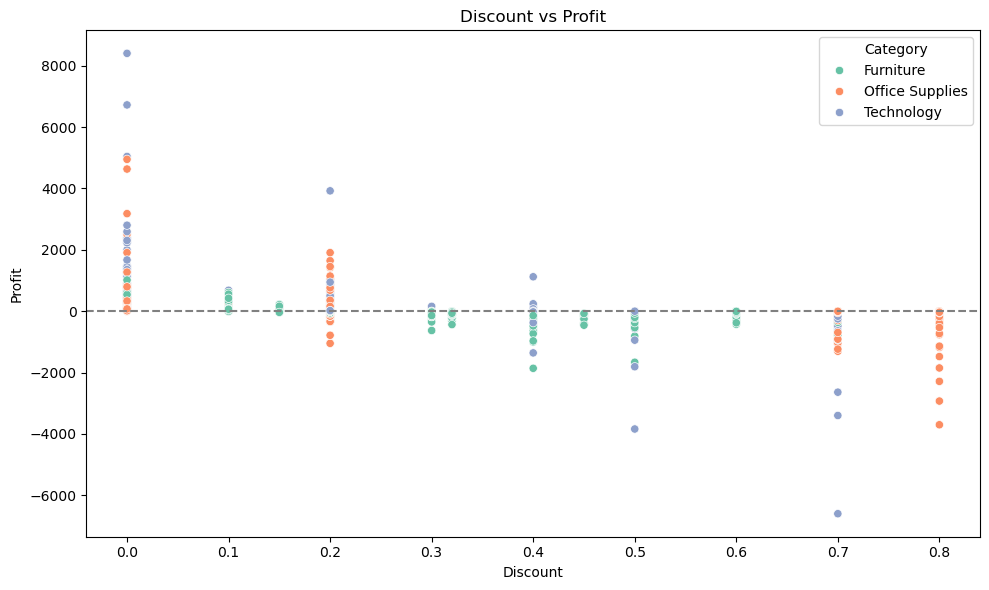

In [404]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Discount', y = 'Profit', data = df, hue = 'Category', palette = 'Set2')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color = 'gray', linestyle = '--')
plt.tight_layout()
plt.show()

### Step 20: Exploring the Relationship Between Sales and Profit by Sub-Category

Here, we use another scatter plot to see the relationship between sales and profit, broken down by sub-category. This helps us identify which sub-categories generate higher returns for the amount of sales they make.

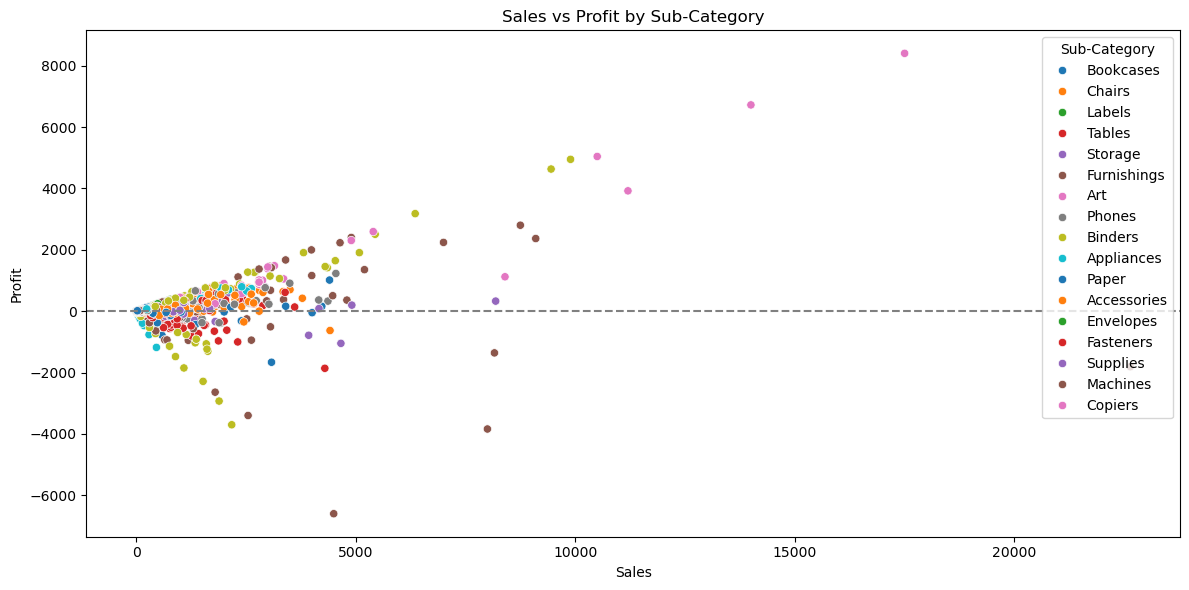

In [406]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data = df, x = 'Sales', y = 'Profit', hue = 'Sub-Category', palette = 'tab10')
plt.title('Sales vs Profit by Sub-Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.axhline(0, color = 'gray', linestyle = '--')
plt.tight_layout()
plt.show()

### Step 21: Correlation Heatmap
We calculate and visualize the correlation between key numerical features: Sales, Profit, Quantity, and Discount. A heatmap allows us to quickly identify which features are strongly correlated.

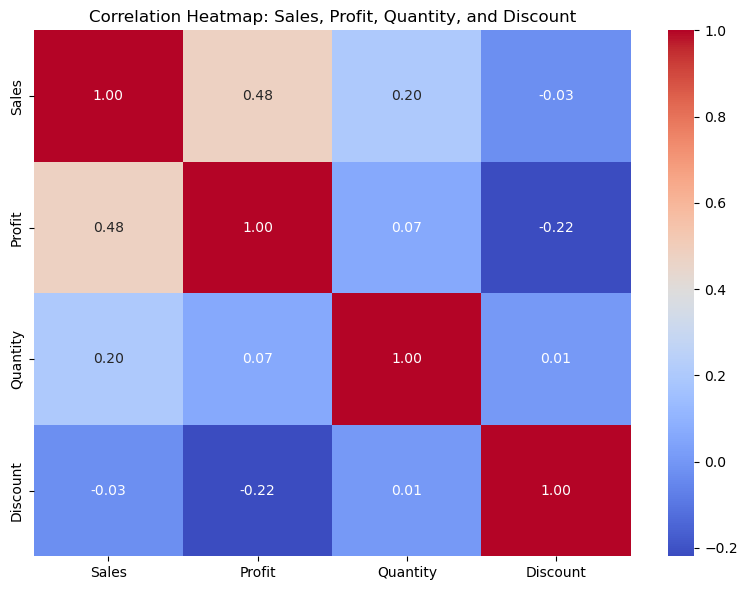

In [408]:
# Calculate correlation matrix
corr = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()

# Plot heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', cbar = True)
plt.title('Correlation Heatmap: Sales, Profit, Quantity, and Discount')
plt.tight_layout()
plt.show()

## Phase 5: Insights & Recommendations

### Insights

1. **Category-wise Sales and Profit:**
   - The **Furniture** and **Technology** categories show high sales figures, with **Technology** also delivering the highest profit margins.
   - The **Office Supplies** category, while having decent sales, shows lower profitability. This suggests that the margins in this category may need improvement through better cost management or a revision of pricing strategies.

2. **Sub-Category Sales & Profit:**
   - Sub-categories like **Chairs** and **Phones** show a good balance of high sales and high profits, making them key areas for strategic focus.
   - **Binders** and **Storage**, while having decent sales, have relatively low profit margins, pointing towards potential issues with pricing or cost structure in these sub-categories.

3. **Correlation Insights:**
   - There is a positive correlation between **Sales** and **Profit**, which is consistent with expectations that higher sales should drive higher profits.
   - **Quantity** shows a moderate negative correlation with **Profit**, suggesting that high volumes of low-cost items may not yield high profit margins.
   - **Discount** appears to have little to no significant effect on **Profit**, which could indicate that the current discount strategy may not be effectively boosting profits.

### Recommendations

1. **Focus on High-Profit Categories:**
   - Given the strong performance of **Technology** and **Furniture**, it would be beneficial to focus more on these categories for future growth. Consider increasing marketing efforts or introducing new products in these areas to drive more sales.

2. **Improve Profitability in Office Supplies:**
   - The **Office Supplies** category, despite decent sales, has relatively low profit margins. Strategies such as better cost management, product differentiation, or revised pricing could help improve margins.

3. **Evaluate Discount Strategy:**
   - Since **Discounts** have minimal effect on profits, it may be worth re-evaluating the discounting strategy. Consider testing alternative strategies such as bundling or offering loyalty incentives to drive more value.

4. **Strategic Pricing for Low-Margin Items:**
   - For low-margin sub-categories like **Binders** and **Storage**, consider re-evaluating the pricing strategy to improve profitability. Alternatively, exploring ways to reduce costs could help improve margins in these areas.